Notes from math modeling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    f = x**2
    return f


x0 = input("initial x:")
xf = input("final x:")
N = input("number of points:")
y = 0
## dy/dx = f(x) --> dy = f(x)*dx
dx = 0.01
x_val = []
y_val = []
while x0 <= xf:
    y = y + func(x0) * dx   
    x0 = x0 + dx
    x_val.append(x0)
    y_val.append(y)
    
plt.plot(x_val, y_val)
plt.show()


Homework 6
gaussian elimination and back substitution

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def exchange_rows(a, i, j):
    for k in range(len(a)):
        tmp = a[i][k]
        a[i][k] = a[j][k]
        a[j][k] = tmp
    return a


def gaussian_upper_triangle(a, b):
    C = np.column_stack((a, b))
    
    for i in range(len(C)):
        if C[i][i] == 0:
            if i < len(C) - 1:
                exchange_rows(C, i, i+1)
        else:
            diag = C[i][i]
            for k in range(i+1, len(C)):
                C[k] = C[k]*diag - C[i]*C[k][i]
    return C


def back_substitution(A):
    N = len(A)
    x = np.zeros(N)
    
    x[N-1] = A[N-1][N]/A[N-1][N-1]
    
    for i in range(N-2, -1, -1):
        s = 0
        for j in range(i+1, N):
            s += A[i][j]*x[j]
        s = A[i][N] - s
        s /= A[i][i]
        x[i] = s
    return x


if __name__ == '__main__':
    A = np.array([[2.0, 1.0, -1.0], [-3.0, -1.0, 2.0], [-2.0, 1.0, 2.0]])
    b = np.array([8, -11, -3])
    
    c = gaussian_upper_triangle(A, b)
    x = back_substitution(c)
    
    test = np.linalg.solve(A, b)
    print(c, x, test)
    print(A.dot(x), b)

Q2

N = [3] is done :D
N = [3, 10] is done :D
N = [3, 10, 20] is done :D
N = [3, 10, 20, 50] is done :D
N = [3, 10, 20, 50, 100] is done :D
N = [3, 10, 20, 50, 100, 500] is done :D


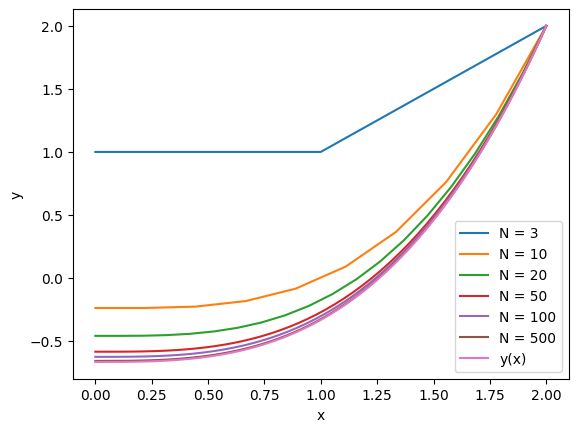

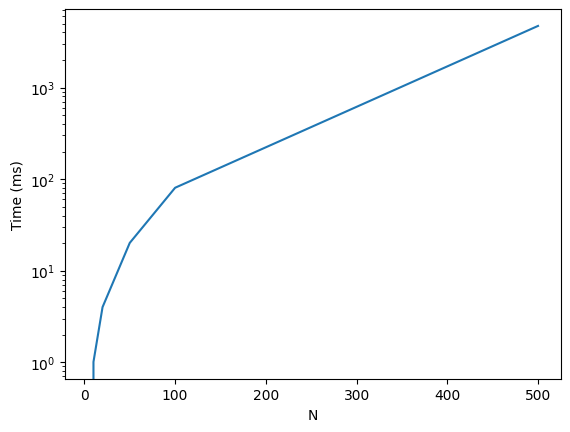

In [7]:
"""
yp = x**2 with boundary condition y(2) = 2 on domain [0, 2] -> 1/3*(x^3 - 2)
"""


import numpy as np
import matplotlib.pyplot as plt
import time

def exchange_rows(a, i, j):
    for k in range(len(a)):
        tmp = a[i][k]
        a[i][k] = a[j][k]
        a[j][k] = tmp
    return a


def gaussian_upper_triangle(a, b):
    C = np.column_stack((a, b))
    
    for i in range(len(C)):
        if C[i][i] == 0:
            if i < len(C) - 1:
                exchange_rows(C, i, i+1)
        else:
            diag = C[i][i]
            for k in range(i+1, len(C)):
                C[k] = C[k]*diag - C[i]*C[k][i]
    return C


def back_substitution(A):
    N = len(A)
    x = np.zeros(N)
    
    x[N-1] = A[N-1][N]/A[N-1][N-1]
    
    for i in range(N-2, -1, -1):
        s = 0
        for j in range(i+1, N):
            s += A[i][j]*x[j]
        s = A[i][N] - s
        s /= A[i][i]
        x[i] = s
    return x



def first_order_2pt(a, b, N, rhs, bc):
    delta = (b- a)/(N-1)
    A = np.zeros((N, N))
    b = np.zeros(N)
    x = np.zeros(N)
    
    for i in range(N):
        A[i][i] = -1
        try:
            A[i][i+1] = 1
        except Exception as e:
            pass
        b[i] = delta*rhs(i*delta)
        x[i] = a+delta*i
    indices = list(bc.keys())
    # Note: first order equation has only one BC
    index = indices[0]
    bc_val = bc[index]
    A[index][index] = b[index]/bc_val
    try:
        A[index][index+1] = 0
    except Exception as e:
        pass
    begin_time = time.time()
    C = gaussian_upper_triangle(A, b)
    y = back_substitution(C)
    end_time = time.time()
    compute_time = (end_time - begin_time) * 1000
    
    return x, y, compute_time

N = []
t = []
rhs = lambda x: x*x
a = 0.0
b = 2.0

x = [a + (b - a)/99*i for i in range(100)]
y = [(xx**3 - 2.0)/3.0 for xx in x]

plt_list = [3, 10, 20, 50, 100, 500]

xx = [np.zeros(10) for i in range(len(plt_list))]
yy = [np.zeros(10) for i in range(len(plt_list))]
tt = [0 for i in range(len(plt_list))]

count = 0
for i in plt_list:
    bc = {i-1: 2.0}
    xx[count], yy[count], tt[count] = first_order_2pt(a, b, i, rhs, bc)
    plt.plot(xx[count], yy[count], label = f"N = {i}")
    N.append(i)
    t.append(tt[count])
    count += 1
    print(f"N = {N} is done :D")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label = 'y(x)')
plt.legend()
plt.show()

plt.xlabel('N')
plt.ylabel('Time (ms)')
plt.yscale('log')
plt.plot(N, t)
plt.show()
    
    

